In [29]:
import os
import cv2
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [30]:
def print_image(file_path='dataset/label_0/262802.jpg'):
    img = cv2.imread(file_path)
    plt.imshow(img)
    plt.show()

In [31]:
def get_file_paths(data_path):
    """
    walk through the directory and subdirectories using os.walk() nad returns a list of file paths
    """
    all_files = []
    for subdir, _, files in os.walk(data_path):
        for file in files:
            file_path = os.path.join(subdir, file)
            all_files.append(file_path)
    return all_files

In [32]:
label_0_path = 'dataset/label_0'
label_1_path = 'dataset/label_1'

label_0_file_paths = pd.Series(get_file_paths(label_0_path))
label_1_file_paths = pd.Series(get_file_paths(label_1_path))


In [33]:
def get_batch(label_0_file_paths, label_0_n_files, label_1_file_paths, label_1_n_files):
    X = np.array(
        [
            cv2.imread(file_path)[:, :, 0].flatten()
            for file_path in label_0_file_paths.sample(label_0_n_files)
        ]
        + [
            cv2.imread(file_path)[:, :, 0].flatten()
            for file_path in label_1_file_paths.sample(label_1_n_files)
        ]
    )
    y = np.array([0] * label_0_n_files + [1] * label_1_n_files)
    return X, y


In [34]:
test_label_0 = label_0_file_paths.sample(500)
test_label_1 = label_1_file_paths.sample(100)

label_0_file_paths = label_0_file_paths[~label_0_file_paths.isin(test_label_0)]
label_1_file_paths = label_1_file_paths[~label_1_file_paths.isin(test_label_1)]

In [35]:
X_test, y_test = get_batch(test_label_0, 500, test_label_1, 100)

In [36]:
nb = GaussianNB()
sgdc = SGDClassifier(n_jobs=-1)



In [37]:
n_steps = 100
with tqdm(total=n_steps) as pbar:
    for i in range(100):
        X, y = get_batch(label_0_file_paths, 500, label_1_file_paths, 100)
        nb.partial_fit(X, y, classes=[0, 1])
        pbar.update(1)
        


100%|██████████| 100/100 [18:06<00:00, 10.87s/it]


In [38]:
y_pred_nb = nb.predict(X_test)



In [39]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.28      0.43       500
           1       0.19      0.83      0.31       100

    accuracy                           0.38       600
   macro avg       0.54      0.56      0.37       600
weighted avg       0.78      0.38      0.41       600



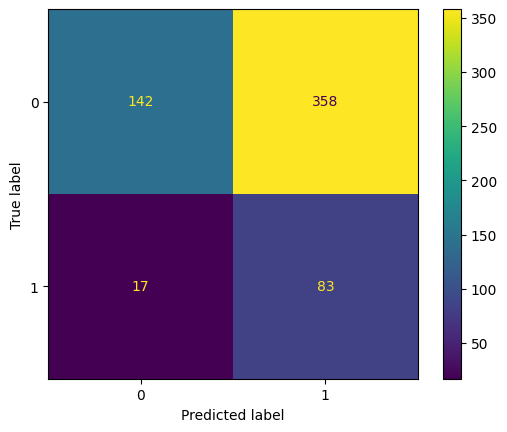

In [40]:
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()